In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
%matplotlib inline 
import seaborn as sns

In [75]:
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier

In [9]:
df = pd.read_csv('/Users/user/Desktop/Progress/1/Udemy - Python for Data Science and Machine Learning/21. K Means Clustering/17-K-Means-Clustering/College_Data')

In [10]:
df.head()

Unnamed: 0 Private  Apps  Accept  Enroll  Top10perc  \
0  Abilene Christian University     Yes  1660    1232     721         23   
1            Adelphi University     Yes  2186    1924     512         16   
2                Adrian College     Yes  1428    1097     336         22   
3           Agnes Scott College     Yes   417     349     137         60   
4     Alaska Pacific University     Yes   193     146      55         16   

   Top25perc  F.Undergrad  P.Undergrad  Outstate  Room.Board  Books  Personal  \
0         52         2885          537      7440        3300    450      2200   
1         29         2683         1227     12280        6450    750      1500   
2         50         1036           99     11250        3750    400      1165   
3         89          510           63     12960        5450    450       875   
4         44          249          869      7560        4120    800      1500   

   PhD  Terminal  S.F.Ratio  perc.alumni  Expend  Grad.Rate  
0   70        78       18.1           12    7041         60  
1   29        30       12.2           16   10527         56  
2   53        66       12.9           30    8735         54  
3   92        97        7.7           37   19016         59  
4   76        72       11.9            2   10922         15

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   777 non-null    object 
 1   Private      777 non-null    object 
 2   Apps         777 non-null    int64  
 3   Accept       777 non-null    int64  
 4   Enroll       777 non-null    int64  
 5   Top10perc    777 non-null    int64  
 6   Top25perc    777 non-null    int64  
 7   F.Undergrad  777 non-null    int64  
 8   P.Undergrad  777 non-null    int64  
 9   Outstate     777 non-null    int64  
 10  Room.Board   777 non-null    int64  
 11  Books        777 non-null    int64  
 12  Personal     777 non-null    int64  
 13  PhD          777 non-null    int64  
 14  Terminal     777 non-null    int64  
 15  S.F.Ratio    777 non-null    float64
 16  perc.alumni  777 non-null    int64  
 17  Expend       777 non-null    int64  
 18  Grad.Rate    777 non-null    int64  
dtypes: float

In [12]:
df.describe()

Apps        Accept       Enroll   Top10perc   Top25perc  \
count    777.000000    777.000000   777.000000  777.000000  777.000000   
mean    3001.638353   2018.804376   779.972973   27.558559   55.796654   
std     3870.201484   2451.113971   929.176190   17.640364   19.804778   
min       81.000000     72.000000    35.000000    1.000000    9.000000   
25%      776.000000    604.000000   242.000000   15.000000   41.000000   
50%     1558.000000   1110.000000   434.000000   23.000000   54.000000   
75%     3624.000000   2424.000000   902.000000   35.000000   69.000000   
max    48094.000000  26330.000000  6392.000000   96.000000  100.000000   

        F.Undergrad   P.Undergrad      Outstate   Room.Board        Books  \
count    777.000000    777.000000    777.000000   777.000000   777.000000   
mean    3699.907336    855.298584  10440.669241  4357.526384   549.380952   
std     4850.420531   1522.431887   4023.016484  1096.696416   165.105360   
min      139.000000      1.000000   2340.000000  1780.000000    96.000000   
25%      992.000000     95.000000   7320.000000  3597.000000   470.000000   
50%     1707.000000    353.000000   9990.000000  4200.000000   500.000000   
75%     4005.000000    967.000000  12925.000000  5050.000000   600.000000   
max    31643.000000  21836.000000  21700.000000  8124.000000  2340.000000   

          Personal         PhD    Terminal   S.F.Ratio  perc.alumni  \
count   777.000000  777.000000  777.000000  777.000000   777.000000   
mean   1340.642214   72.660232   79.702703   14.089704    22.743887   
std     677.071454   16.328155   14.722359    3.958349    12.391801   
min     250.000000    8.000000   24.000000    2.500000     0.000000   
25%     850.000000   62.000000   71.000000   11.500000    13.000000   
50%    1200.000000   75.000000   82.000000   13.600000    21.000000   
75%    1700.000000   85.000000   92.000000   16.500000    31.000000   
max    6800.000000  103.000000  100.000000   39.800000    64.000000   

             Expend  Grad.Rate  
count    777.000000  777.00000  
mean    9660.171171   65.46332  
std     5221.768440   17.17771  
min     3186.000000   10.00000  
25%     6751.000000   53.00000  
50%     8377.000000   65.00000  
75%    10830.000000   78.00000  
max    56233.000000  118.00000

In [14]:
df[['Private','Apps']].groupby('Private',as_index=False).mean().sort_values(by='Apps',ascending=False)

Private         Apps
0      No  5729.919811
1     Yes  1977.929204

In [15]:
df[['Private','Enroll']].groupby('Private',as_index=False).mean().sort_values(by='Enroll',ascending=False)

Private       Enroll
0      No  1640.872642
1     Yes   456.945133

In [16]:
df[['Private','Grad.Rate']].groupby('Private',as_index=False).mean().sort_values(by='Grad.Rate',ascending=False)

Private  Grad.Rate
1     Yes  68.998230
0      No  56.042453

<AxesSubplot:xlabel='Room.Board', ylabel='Grad.Rate'>

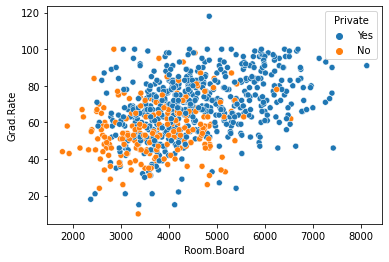

In [18]:
sns.scatterplot(data=df,x='Room.Board',y='Grad.Rate',hue='Private')

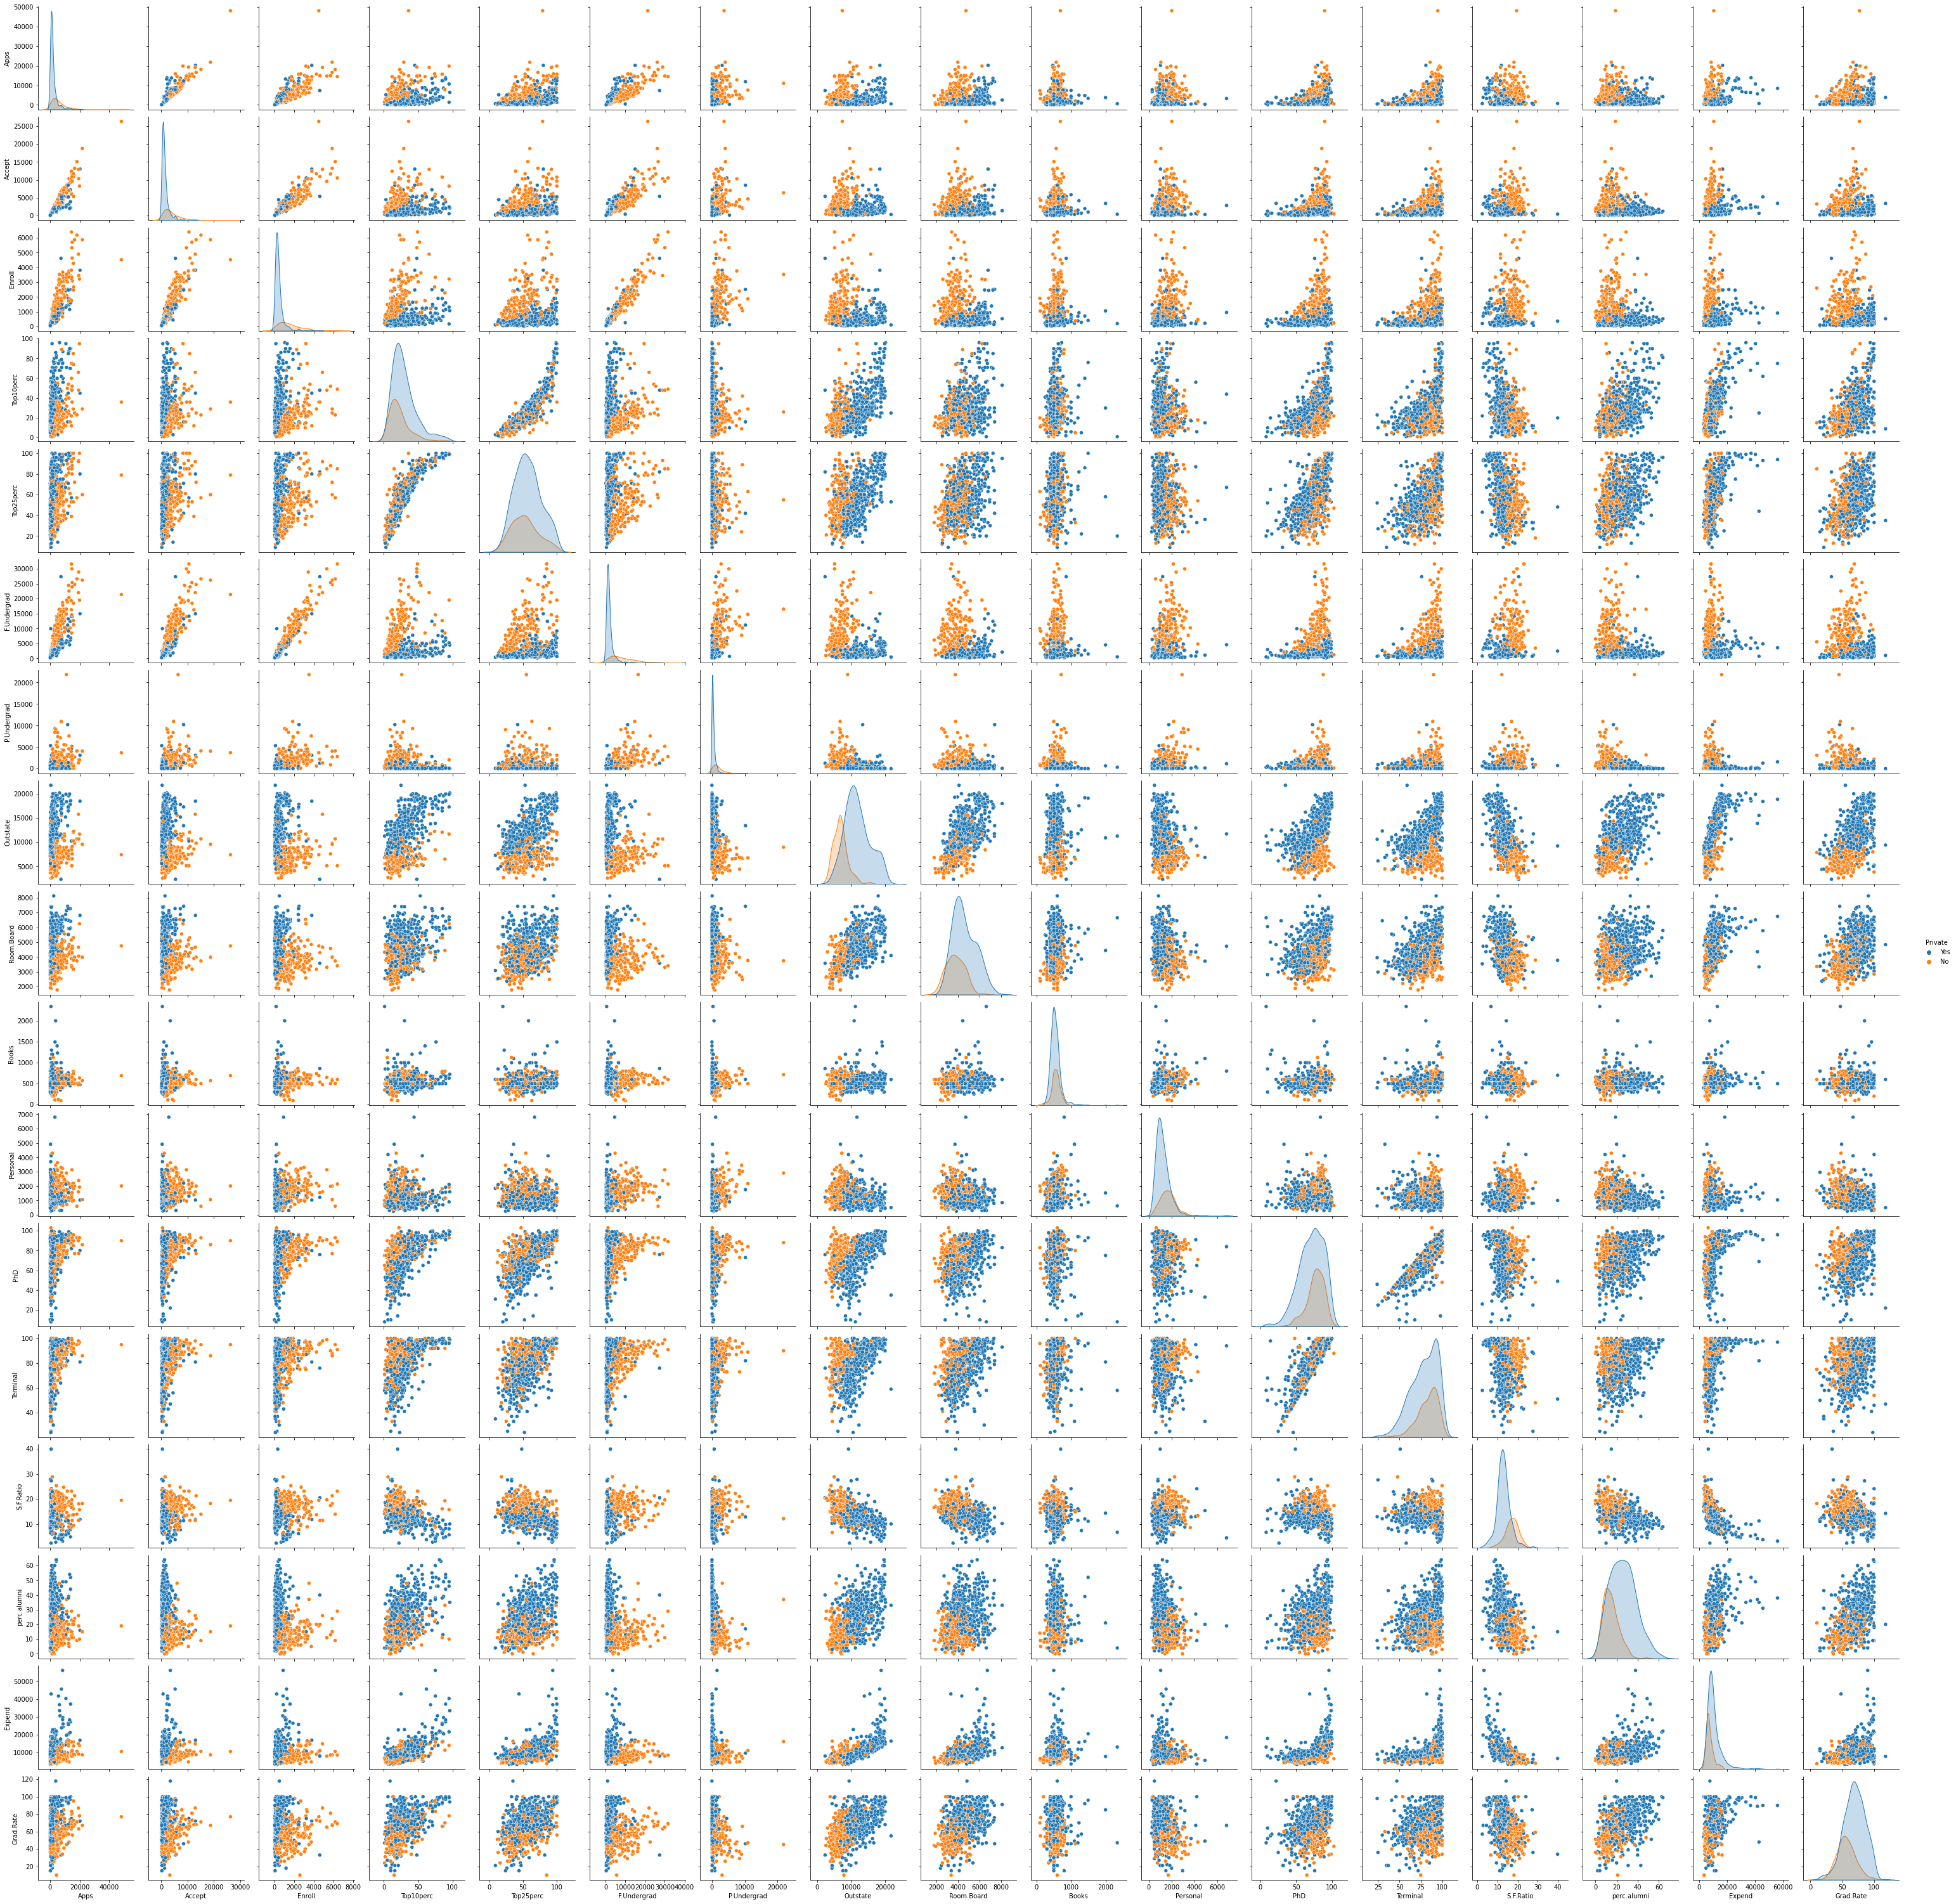

In [19]:
sns.pairplot(df,hue='Private')

<AxesSubplot:xlabel='Top10perc', ylabel='Expend'>

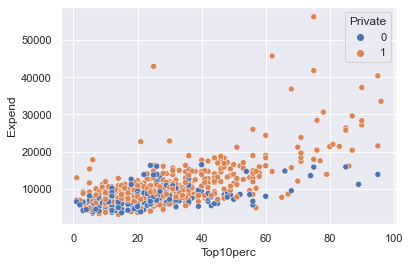

In [99]:
sns.scatterplot(data=df,x='Top10perc',y='Expend',hue='Private')

<AxesSubplot:xlabel='Outstate', ylabel='Count'>

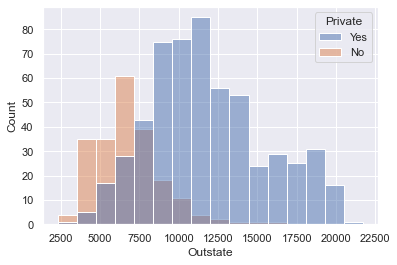

In [24]:
sns.set_theme(font_scale=1)
sns.histplot(data=df,x='Outstate',hue='Private')

<AxesSubplot:xlabel='Grad.Rate', ylabel='Count'>

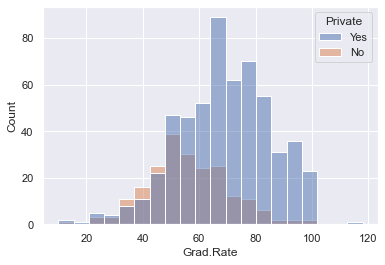

In [25]:
sns.histplot(data=df,x='Grad.Rate',hue='Private')

In [26]:
df[df['Grad.Rate']>100]

Unnamed: 0 Private  Apps  Accept  Enroll  Top10perc  Top25perc  \
95  Cazenovia College     Yes  3847    3433     527          9         35   

    F.Undergrad  P.Undergrad  Outstate  Room.Board  Books  Personal  PhD  \
95         1010           12      9384        4840    600       500   22   

    Terminal  S.F.Ratio  perc.alumni  Expend  Grad.Rate  
95        47       14.3           20    7697        118

In [37]:
df.replace(to_replace=df.iloc[95]['Grad.Rate'],value=100,inplace=True)

In [38]:
df.iloc[95]['Grad.Rate']

100

In [67]:
kmeans = KMeans(n_clusters=2)
x = df.drop(['Unnamed: 0','Private','Cluster'],axis=1)
y = df['Private']

In [42]:
kmeans.fit(x)

KMeans(n_clusters=2)

In [43]:
kmeans.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [44]:
kmeans.cluster_centers_

array([[1.03631389e+04, 6.55089815e+03, 2.56972222e+03, 4.14907407e+01,
        7.02037037e+01, 1.30619352e+04, 2.46486111e+03, 1.07191759e+04,
        4.64347222e+03, 5.95212963e+02, 1.71420370e+03, 8.63981481e+01,
        9.13333333e+01, 1.40277778e+01, 2.00740741e+01, 1.41705000e+04,
        6.75925926e+01],
       [1.81323468e+03, 1.28713901e+03, 4.91044843e+02, 2.53094170e+01,
        5.34708520e+01, 2.18854858e+03, 5.95378176e+02, 1.03957085e+04,
        4.31136472e+03, 5.41982063e+02, 1.28033632e+03, 7.04424514e+01,
        7.78251121e+01, 1.40997010e+01, 2.31748879e+01, 8.93204634e+03,
        6.50926756e+01]])

In [46]:
df['Cluster'] = kmeans.labels_

In [47]:
df.head()

Unnamed: 0 Private  Apps  Accept  Enroll  Top10perc  \
0  Abilene Christian University     Yes  1660    1232     721         23   
1            Adelphi University     Yes  2186    1924     512         16   
2                Adrian College     Yes  1428    1097     336         22   
3           Agnes Scott College     Yes   417     349     137         60   
4     Alaska Pacific University     Yes   193     146      55         16   

   Top25perc  F.Undergrad  P.Undergrad  Outstate  Room.Board  Books  Personal  \
0         52         2885          537      7440        3300    450      2200   
1         29         2683         1227     12280        6450    750      1500   
2         50         1036           99     11250        3750    400      1165   
3         89          510           63     12960        5450    450       875   
4         44          249          869      7560        4120    800      1500   

   PhD  Terminal  S.F.Ratio  perc.alumni  Expend  Grad.Rate  Cluster  
0   70        78       18.1           12    7041         60        1  
1   29        30       12.2           16   10527         56        1  
2   53        66       12.9           30    8735         54        1  
3   92        97        7.7           37   19016         59        1  
4   76        72       11.9            2   10922         15        1

In [48]:
mmap = {'Yes':1,'No':0}
df['Private'] = df['Private'].map(mmap)
print(classification_report(df['Private'],df['Cluster']))

              precision    recall  f1-score   support

           0       0.69      0.35      0.46       212
           1       0.79      0.94      0.86       565

    accuracy                           0.78       777
   macro avg       0.74      0.64      0.66       777
weighted avg       0.76      0.78      0.75       777



In [49]:
df.head()

Unnamed: 0  Private  Apps  Accept  Enroll  Top10perc  \
0  Abilene Christian University        1  1660    1232     721         23   
1            Adelphi University        1  2186    1924     512         16   
2                Adrian College        1  1428    1097     336         22   
3           Agnes Scott College        1   417     349     137         60   
4     Alaska Pacific University        1   193     146      55         16   

   Top25perc  F.Undergrad  P.Undergrad  Outstate  Room.Board  Books  Personal  \
0         52         2885          537      7440        3300    450      2200   
1         29         2683         1227     12280        6450    750      1500   
2         50         1036           99     11250        3750    400      1165   
3         89          510           63     12960        5450    450       875   
4         44          249          869      7560        4120    800      1500   

   PhD  Terminal  S.F.Ratio  perc.alumni  Expend  Grad.Rate  Cluster  
0   70        78       18.1           12    7041         60        1  
1   29        30       12.2           16   10527         56        1  
2   53        66       12.9           30    8735         54        1  
3   92        97        7.7           37   19016         59        1  
4   76        72       11.9            2   10922         15        1

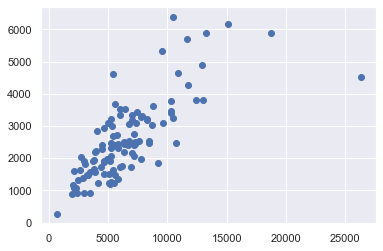

In [72]:
label = kmeans.fit_predict(x)
filtered_label = df[df['Cluster']==0]
plt.scatter(filtered_label['Accept'],filtered_label['Enroll'])
# u_label = np.unique(kmeans.labels_)
# for i in u_label:
#     plt.scatter(df[kmeans.labels_ == i,0],df[kmeans.labels_ == i,1], label = i)
# plt.legend()

In [121]:
lr = LogisticRegression()
y = df['Private']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3)
lr.fit(x_train,y_train)
predictions = lr.predict(x_test)
print(classification_report(y_test,predictions))
print(round(lr.score(x_train,y_train)*100,2))

              precision    recall  f1-score   support

           0       0.89      0.91      0.90        55
           1       0.97      0.97      0.97       179

    accuracy                           0.95       234
   macro avg       0.93      0.94      0.94       234
weighted avg       0.95      0.95      0.95       234

93.92


c:\users\user\appdata\local\programs\python\python36-32\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [95]:
coeff_df = pd.DataFrame(x_train.columns.delete(0))
coeff_df.columns = ['Features']
coeff_df['Correlation'] = pd.Series(lr.coef_[0])
coeff_df.sort_values(by='Correlation',ascending=False)

Features  Correlation
2     Top10perc     0.002132
14       Expend     0.002074
9      Personal     0.001313
7    Room.Board     0.000735
15    Grad.Rate     0.000350
8         Books     0.000295
0        Accept    -0.000195
5   P.Undergrad    -0.000268
6      Outstate    -0.000304
10          PhD    -0.000384
1        Enroll    -0.000993
3     Top25perc    -0.001148
13  perc.alumni    -0.008898
4   F.Undergrad    -0.010838
12    S.F.Ratio    -0.041577
11     Terminal    -0.045824

In [83]:
error_rate =[]
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    predictions_i = knn.predict(x_test)
    error_rate.append(np.mean(y_test != predictions_i))
index = error_rate.index(min(error_rate)) + 1
print(min(error_rate), index)

0.038461538461538464 31


Text(0.5, 1.0, 'Error Rate Vs K Value')

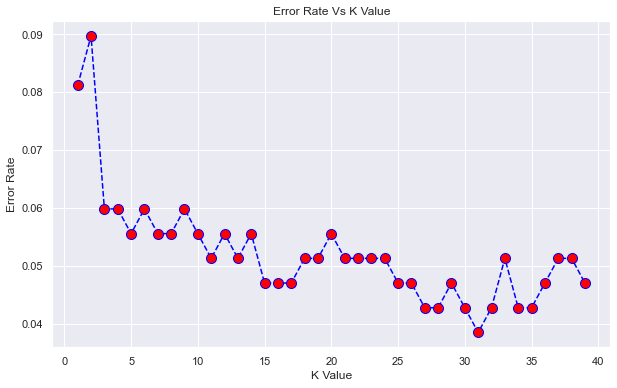

In [120]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue',marker='o',linestyle='dashed',markerfacecolor='red',markersize=10)
plt.xlabel('K Value')
plt.ylabel('Error Rate')
plt.title('Error Rate Vs K Value')

In [119]:

knn = KNeighborsClassifier(n_neighbors=31)
y = df['Private']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3)
knn.fit(x_train,y_train)
predictions = knn.predict(x_test)
print(classification_report(y_test,predictions))
print(round(knn.score(x_train,y_train)*100,2))

              precision    recall  f1-score   support

           0       0.96      0.81      0.88        67
           1       0.93      0.99      0.96       167

    accuracy                           0.94       234
   macro avg       0.95      0.90      0.92       234
weighted avg       0.94      0.94      0.93       234

93.37


In [127]:
rfc = RandomForestClassifier()
x = df.drop(['Unnamed: 0','Private','Cluster'],axis=1)
y = df['Private']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3)
rfc.fit(x_train,y_train)
predictions = rfc.predict(x_test)
print(classification_report(y_test,predictions))
print(round(rfc.score(x_train,y_train)*100,2))

              precision    recall  f1-score   support

           0       0.95      0.85      0.90        67
           1       0.94      0.98      0.96       167

    accuracy                           0.94       234
   macro avg       0.95      0.92      0.93       234
weighted avg       0.94      0.94      0.94       234

100.0


In [128]:
svm = SVC()
x = df.drop(['Unnamed: 0','Private','Cluster'],axis=1)
y = df['Private']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3)
svm.fit(x_train,y_train)
predictions = svm.predict(x_test)
print(classification_report(y_test,predictions))
print(round(svm.score(x_train,y_train)*100,2))

              precision    recall  f1-score   support

           0       0.91      0.81      0.86        59
           1       0.94      0.97      0.96       175

    accuracy                           0.93       234
   macro avg       0.92      0.89      0.91       234
weighted avg       0.93      0.93      0.93       234

93.74


In [129]:
scores = {'KNN':knn.score(x_train,y_train),
                           'SVM':svm.score(x_train,y_train),
                           'LR':lr.score(x_train,y_train),
                           'RFC':rfc.score(x_train,y_train)}
results_df = pd.DataFrame(list(scores.items()),columns=['Method','Score'])
results_df.sort_values(by='Score',ascending=False)

Method     Score
3    RFC  0.981584
2     LR  0.946593
0    KNN  0.937385
1    SVM  0.937385